# #IMPORTING IMPORTANT LIBRARIES

In [50]:
#THIS CHURN PREDICTION IS MOSTLY DONE BY PLAIN PYTHON NOT USED MOST LIBRARIES TO LABEL ENCODE AND OTHER STUFF.
#CODE IS ALSO VERY EASY TO UNDERSTAND

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('churn.csv')
data.head()

,Sex,Marital_Status,Term,Phone_service,International_plan,Voice_mail_plan,Multiple_line,Internet_service,Technical_support,Streaming_Videos,Agreement_period,Monthly_Charges,Total_Charges,Churn
0,Female,Married,16,Yes,Yes,Yes,No,Cable,Yes,No,Monthly contract,98.05,1410.25,Yes
1,Male,Married,70,Yes,No,Yes,No,Cable,Yes,Yes,One year contract,75.25,5023.00,No
2,Female,Married,36,Yes,No,Yes,No,Cable,Yes,Yes,Monthly contract,73.35,2379.10,No
3,Female,Married,72,Yes,No,No,Yes,Cable,Yes,Yes,One year contract,112.60,7882.25,No
4,Female,Married,40,Yes,Yes,No,Yes,Cable,No,Yes,Monthly contract,95.05,3646.80,No


In [3]:
data.shape

(1000, 14)

In [4]:
for column in data:
    if data[column].dtype=='object':
        print(f'{column} : {data[column].unique()}')

Sex : ['Female' 'Male']
Marital_Status : ['Married' 'Single']
Phone_service : ['Yes' 'No']
International_plan : ['Yes' 'No' 'yes']
Voice_mail_plan : ['Yes' 'No']
Multiple_line : ['No' 'Yes' 'No phone ']
Internet_service : ['Cable' 'No Internet' 'DSL' 'Fiber optic']
Technical_support : ['Yes' 'No' 'No internet ']
Streaming_Videos : ['No' 'Yes' 'No internet ']
Agreement_period : ['Monthly contract' 'One year contract' 'Two year contract']
Churn : ['Yes' 'No']


In [5]:
data.Churn.value_counts()

No     741
Yes    259
Name: Churn, dtype: int64

In [6]:
leaving=data[data.Churn=='Yes'].Term
not_leaving=data[data.Churn=='No'].Term

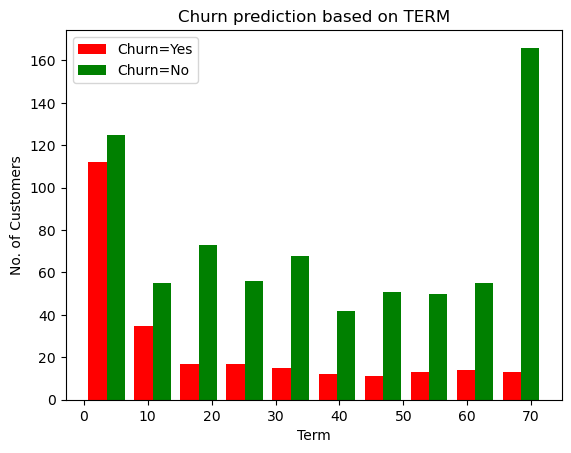

In [7]:
plt.hist([leaving, not_leaving], color=['red','green'], label=['Churn=Yes','Churn=No'])
plt.xlabel('Term')
plt.ylabel('No. of Customers')
plt.title('Churn prediction based on TERM')
plt.legend()

In [8]:
def unique_columns(column):
    for column in data:
        if data[column].dtype=='object':
            print(f'{column} : {data[column].unique()}')

In [9]:
data.replace('No phone ','No',inplace=True)
data.replace('No internet ','No',inplace=True)
data.replace('yes','Yes',inplace=True)

In [10]:
unique_columns(column)

Sex : ['Female' 'Male']
Marital_Status : ['Married' 'Single']
Phone_service : ['Yes' 'No']
International_plan : ['Yes' 'No']
Voice_mail_plan : ['Yes' 'No']
Multiple_line : ['No' 'Yes']
Internet_service : ['Cable' 'No Internet' 'DSL' 'Fiber optic']
Technical_support : ['Yes' 'No']
Streaming_Videos : ['No' 'Yes']
Agreement_period : ['Monthly contract' 'One year contract' 'Two year contract']
Churn : ['Yes' 'No']


In [11]:
yes_no_cols=['Phone_service','International_plan','Voice_mail_plan','Multiple_line','Technical_support','Streaming_Videos','Churn']

In [12]:
for col in yes_no_cols:
    data[col].replace({'Yes':1,'No':0},inplace=True)

In [13]:
unique_columns(column)

Sex : ['Female' 'Male']
Marital_Status : ['Married' 'Single']
Internet_service : ['Cable' 'No Internet' 'DSL' 'Fiber optic']
Agreement_period : ['Monthly contract' 'One year contract' 'Two year contract']


In [14]:
data['Sex'].replace({'Female':0,'Male':1},inplace=True)
data['Marital_Status'].replace({'Married':1,'Single':0},inplace=True)

In [15]:
unique_columns(column)

Internet_service : ['Cable' 'No Internet' 'DSL' 'Fiber optic']
Agreement_period : ['Monthly contract' 'One year contract' 'Two year contract']


In [16]:
data=pd.get_dummies(data=data,columns=['Internet_service','Agreement_period'])

In [17]:
data.head()

,Sex,Marital_Status,Term,Phone_service,International_plan,Voice_mail_plan,Multiple_line,Technical_support,Streaming_Videos,Monthly_Charges,Total_Charges,Churn,Internet_service_Cable,Internet_service_DSL,Internet_service_Fiber optic,Internet_service_No Internet,Agreement_period_Monthly contract,Agreement_period_One year contract,Agreement_period_Two year contract
0,0,1,16,1,1,1,0,1,0,98.05,1410.25,1,1,0,0,0,1,0,0
1,1,1,70,1,0,1,0,1,1,75.25,5023.00,0,1,0,0,0,0,1,0
2,0,1,36,1,0,1,0,1,1,73.35,2379.10,0,1,0,0,0,1,0,0
3,0,1,72,1,0,0,1,1,1,112.60,7882.25,0,1,0,0,0,0,1,0
4,0,1,40,1,1,0,1,0,1,95.05,3646.80,0,1,0,0,0,1,0,0


In [18]:
data.shape

(1000, 19)

In [19]:
unique_columns(column)

In [20]:
data.columns

Index(['Sex', 'Marital_Status', 'Term', 'Phone_service', 'International_plan',
       'Voice_mail_plan', 'Multiple_line', 'Technical_support',
       'Streaming_Videos', 'Monthly_Charges', 'Total_Charges', 'Churn',
       'Internet_service_Cable', 'Internet_service_DSL',
       'Internet_service_Fiber optic', 'Internet_service_No Internet',
       'Agreement_period_Monthly contract',
       'Agreement_period_One year contract',
       'Agreement_period_Two year contract'],
      dtype='object')

In [21]:
data.dtypes

Sex                                     int64
Marital_Status                          int64
Term                                    int64
Phone_service                           int64
International_plan                      int64
Voice_mail_plan                         int64
Multiple_line                           int64
Technical_support                       int64
Streaming_Videos                        int64
Monthly_Charges                       float64
Total_Charges                         float64
Churn                                   int64
Internet_service_Cable                  uint8
Internet_service_DSL                    uint8
Internet_service_Fiber optic            uint8
Internet_service_No Internet            uint8
Agreement_period_Monthly contract       uint8
Agreement_period_One year contract      uint8
Agreement_period_Two year contract      uint8
dtype: object

In [22]:
data.head()

,Sex,Marital_Status,Term,Phone_service,International_plan,Voice_mail_plan,Multiple_line,Technical_support,Streaming_Videos,Monthly_Charges,Total_Charges,Churn,Internet_service_Cable,Internet_service_DSL,Internet_service_Fiber optic,Internet_service_No Internet,Agreement_period_Monthly contract,Agreement_period_One year contract,Agreement_period_Two year contract
0,0,1,16,1,1,1,0,1,0,98.05,1410.25,1,1,0,0,0,1,0,0
1,1,1,70,1,0,1,0,1,1,75.25,5023.00,0,1,0,0,0,0,1,0
2,0,1,36,1,0,1,0,1,1,73.35,2379.10,0,1,0,0,0,1,0,0
3,0,1,72,1,0,0,1,1,1,112.60,7882.25,0,1,0,0,0,0,1,0
4,0,1,40,1,1,0,1,0,1,95.05,3646.80,0,1,0,0,0,1,0,0


In [23]:
col_to_scale=['Term','Monthly_Charges','Total_Charges']

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler=MinMaxScaler()

In [26]:
data[col_to_scale]=scaler.fit_transform(data[col_to_scale])

In [27]:
data.head()

,Sex,Marital_Status,Term,Phone_service,International_plan,Voice_mail_plan,Multiple_line,Technical_support,Streaming_Videos,Monthly_Charges,Total_Charges,Churn,Internet_service_Cable,Internet_service_DSL,Internet_service_Fiber optic,Internet_service_No Internet,Agreement_period_Monthly contract,Agreement_period_One year contract,Agreement_period_Two year contract
0,0,1,0.222222,1,1,1,0,1,0,0.812950,0.165880,1,1,0,0,0,1,0,0
1,1,1,0.972222,1,0,1,0,1,1,0.578623,0.592339,0,1,0,0,0,0,1,0
2,0,1,0.500000,1,0,1,0,1,1,0.559096,0.280246,0,1,0,0,0,1,0,0
3,0,1,1.000000,1,0,0,1,1,1,0.962487,0.929853,0,1,0,0,0,0,1,0
4,0,1,0.555556,1,1,0,1,0,1,0.782117,0.429888,0,1,0,0,0,1,0,0


In [28]:
x=data.drop(['Churn'],axis=1)
y=data[['Churn']]

In [29]:
x.shape

(1000, 18)

In [30]:
y.shape

(1000, 1)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
##By using the KERAS AND TENSORFLOW Model
import tensorflow as tf
from tensorflow import keras

In [34]:
model=keras.Sequential([
    keras.layers.Dense(26,input_shape=(18,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid',bias_initializer='zeros',kernel_initializer='ones')
])

In [35]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [36]:
model.fit(x_train,y_train,epochs=500)

Epoch 1/500


25/25 [==============================] - 1s 2ms/step - loss: 3.1075 - accuracy: 0.2600
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 1.8574 - accuracy: 0.2600
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 1.2672 - accuracy: 0.2600
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 1.0106 - accuracy: 0.2700
Epoch 5/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8876 - accuracy: 0.2775
Epoch 6/500
25/25 [==============================] - 0s 3ms/step - loss: 0.8167 - accuracy: 0.3325
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7718 - accuracy: 0.3900
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7410 - accuracy: 0.4350
Epoch 9/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7184 - accuracy: 0.4863
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.7016 - accuracy: 0.5562
Epoch 1

In [37]:
model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.7950


[0.4418371915817261, 0.7950000166893005]

In [38]:
y_test.tail(10)

,Churn
948,1
829,0
656,0
199,1
213,0
408,0
332,1
208,0
613,1
78,1


In [39]:
y_pred=model.predict(x_test)

7/7 [==============================] - 0s 2ms/step


In [40]:
y_pred[:5]

array([[0.05995844],
       [0.03129396],
       [0.96678823],
       [0.03129396],
       [0.44097596]], dtype=float32)

In [41]:
y_prediction = []
for element in y_pred:
    if element > 0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)    

In [42]:
model.predict([[0,1,0.222222,1,1,1,0,1,0,0.812950,0.165880,1,0,0,0,1,0,0]])

1/1 [==============================] - 0s 69ms/step


array([[0.53606355]], dtype=float32)

In [45]:
#compare y_test and y_pred value to see whether the values is correct or not
y_prediction[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [46]:
y_test[:10]

,Churn
521,0
737,0
740,1
660,0
411,0
678,1
626,0
513,0
859,0
136,0


In [48]:
residuals=y_pred-y_test

In [49]:
residuals

,Churn
521,0.059958
737,0.031294
740,-0.033212
660,0.031294
411,0.440976
...,...
408,0.043860
332,-0.652077
208,0.127946
613,-0.185992
